In [3]:
pip install seaborn 

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\NTC\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:
import os                          # لإدارة الملفات والمجلدات
import numpy as np                # للتعامل مع البيانات العددية
import matplotlib.pyplot as plt   # لعرض الصور والرسوم البيانية
import seaborn as sns             # لتحسين الرسوم البيانية
import tensorflow as tf           # مكتبة الذكاء الاصطناعي الرئيسية
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # لتجهيز الصور للتدريب
from tensorflow.keras.models import Sequential                       # لبناء النموذج بالتسلسل
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  # مكونات CNN
from sklearn.metrics import classification_report, confusion_matrix  # لتقييم النموذج


In [11]:
# نحدد المسار الذي يحتوي على الصور (بعد تحميلها وفك ضغطها من كاجل)
base_dir = r"C:\Users\NTC\Desktop\mine\Career\projects\10-Blood Cell Images Based Classification\archive (1)\dataset2-master\dataset2-master\images"
# يحتوي على مجلدات train/ و test/

# استخدم ImageDataGenerator لتجهيز الصور
train_gen = ImageDataGenerator(rescale=1./255)  # نقسم كل بكسل على 255 لتطبيعه
test_gen = ImageDataGenerator(rescale=1./255)

# تحميل الصور من مجلدات التصنيفات تلقائيًا
train_data = train_gen.flow_from_directory(
    base_dir + r'\train',
    target_size=(64, 64),      # تصغير الصورة لسهولة المعالجة
    batch_size=32,
    class_mode='categorical'   # لأنها متعددة الفئات
)

test_data = test_gen.flow_from_directory(
    base_dir + r'\test',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)


Found 9957 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.


In [12]:
model = Sequential()

# الطبقة الأولى: فلتر + تفعيل
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

# الطبقة الثانية
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# الطبقة الثالثة
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# تحويل المصفوفة إلى طبقة واحدة
model.add(Flatten())

# طبقة مخفية
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # لتقليل overfitting

# طبقة الإخراج بعدد الأصناف الأربعة
model.add(Dense(4, activation='softmax'))  # softmax لأن لدينا 4 تصنيفات

# تجميع النموذج
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


c:\Users\NTC\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=10
)


c:\Users\NTC\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 515s 2s/step - accuracy: 0.2626 - loss: 1.3863 - val_accuracy: 0.3989 - val_loss: 1.2040
Epoch 2/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 133s 425ms/step - accuracy: 0.4522 - loss: 1.1535 - val_accuracy: 0.6184 - val_loss: 0.8681
Epoch 3/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 140s 448ms/step - accuracy: 0.6436 - loss: 0.8173 - val_accuracy: 0.7093 - val_loss: 0.6238
Epoch 4/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 118s 369ms/step - accuracy: 0.7079 - loss: 0.6390 - val_accuracy: 0.7053 - val_loss: 0.5751
Epoch 5/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 95s 305ms/step - accuracy: 0.7483 - loss: 0.5440 - val_accuracy: 0.6639 - val_loss: 0.9963
Epoch 6/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 136s 435ms/step - accuracy: 0.7797 - loss: 0.5013 - val_accuracy: 0.7471 - val_loss: 0.5925
Epoch 7/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 132s 423ms/step - accuracy: 0.8211 - loss: 0.4120 - val_accuracy: 0.7696 - val_loss: 0.6024
Epoch 8/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 135s 434ms/step - accuracy: 0.8418 - los

In [14]:
# التقييم على بيانات الاختبار
loss, acc = model.evaluate(test_data)
print(f"Loss: {loss:.4f}, Accuracy: {acc:.4f}")


78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - accuracy: 0.7579 - loss: 0.5545
Loss: 0.5983, Accuracy: 0.7491


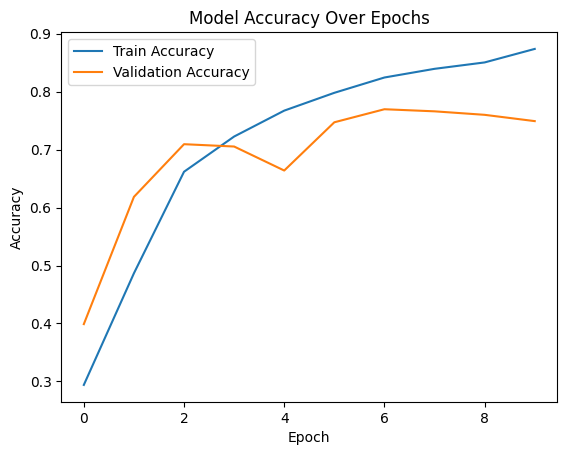

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Over Epochs')
plt.show()


In [1]:
model.save('blood_cell_classifier.h5')  # حفظ النموذج بامتداد H5


NameError: name 'model' is not defined

In [20]:
from tensorflow.keras.preprocessing import image
# تحميل صورة جديدة من بيانات الاختبار (تأكد أن الصورة موجودة فعلاً في هذا المسار)
img_path = r"C:\Users\NTC\Desktop\mine\Career\projects\10-Blood Cell Images Based Classification\archive (1)\dataset2-master\dataset2-master\images\TEST\MONOCYTE\_0_251.jpeg"
img = image.load_img(img_path, target_size=(64, 64))

# تجهيز الصورة بنفس طريقة التدريب
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

# التنبؤ باستخدام النموذج المدرب
prediction = model.predict(img_array)
class_index = np.argmax(prediction)

# عرض اسم الفئة المتوقعة
labels = list(train_data.class_indices.keys())
print("Predicted Class:", labels[class_index])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
Predicted Class: MONOCYTE
